In [43]:
source('./data_processing.R')

In [44]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# V35_M2B

In [45]:
input_dir = './GiRAFR_outputs/Belk_CancerCell/sample1/'
output_dir = './figures_results/Belk_CancerCell/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 5666"
[1] "Wildtype UMI: 140247"
[1] "Mutant UMI: 6758"


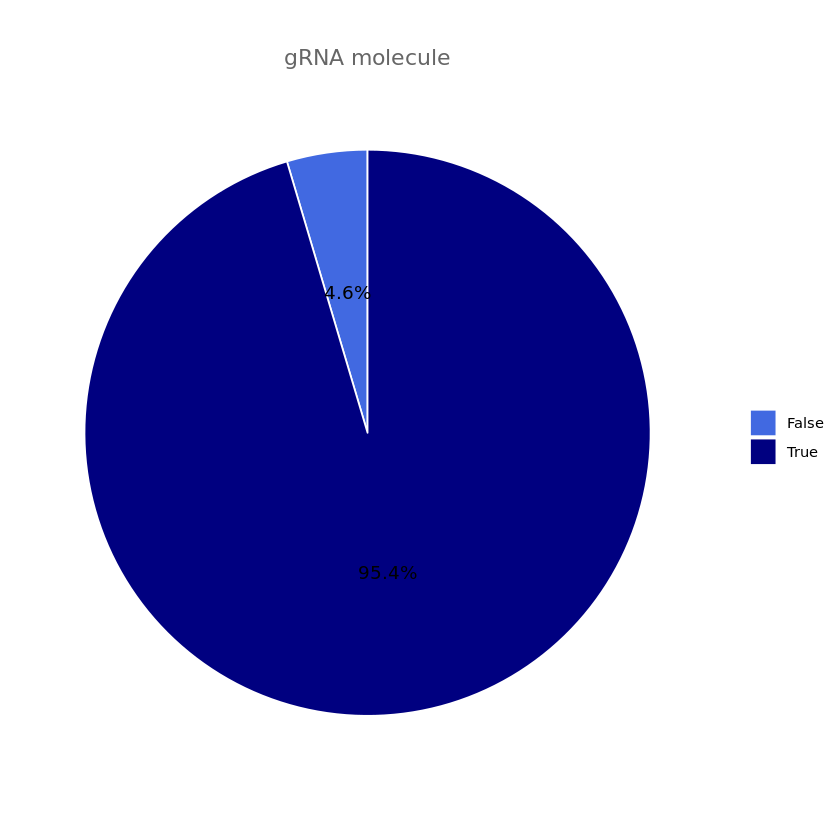

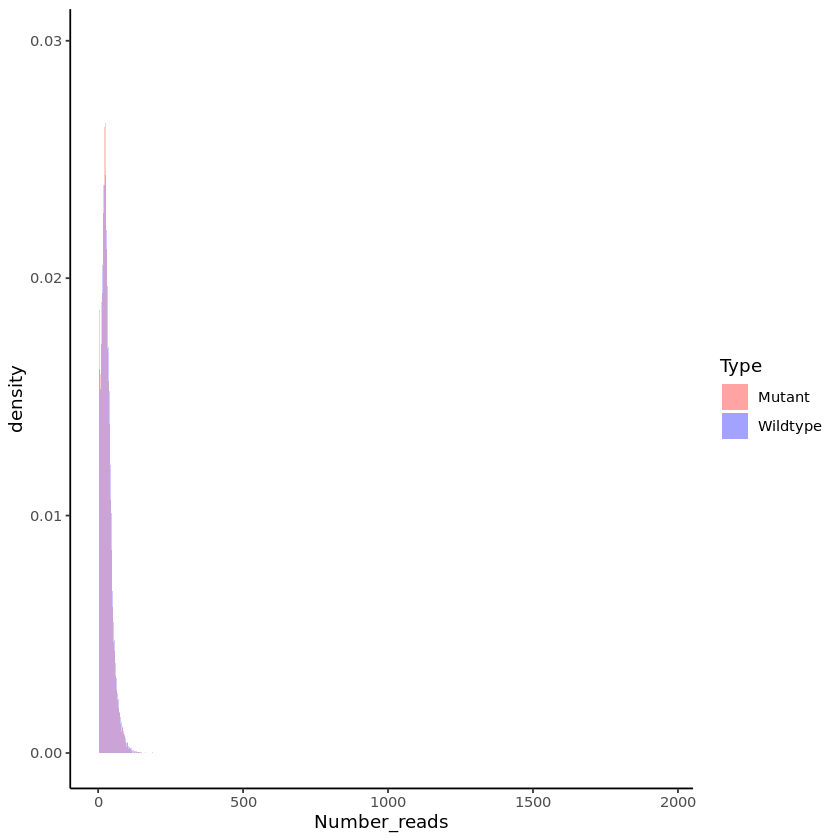

In [4]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [4]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 4525"
[1] "MT_virus: 2233"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(8)    G I(1)    T 
  34    9   18    2    1    1   34    7   27 
[1] "MT mutation type"

  D   I   S 
 22   7 104 
[1] "MT mutation structure"

gRNA Rest  TSO 
  81   12   40 


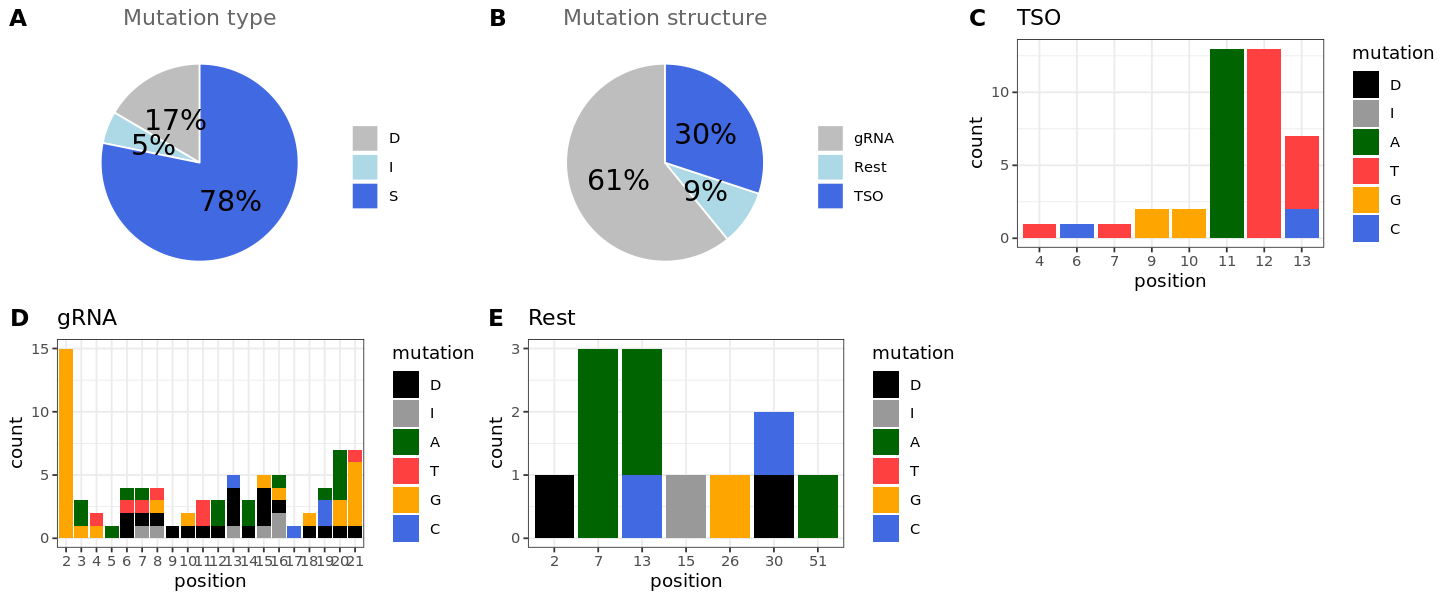

In [46]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [47]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.705   2.000  10.000 

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


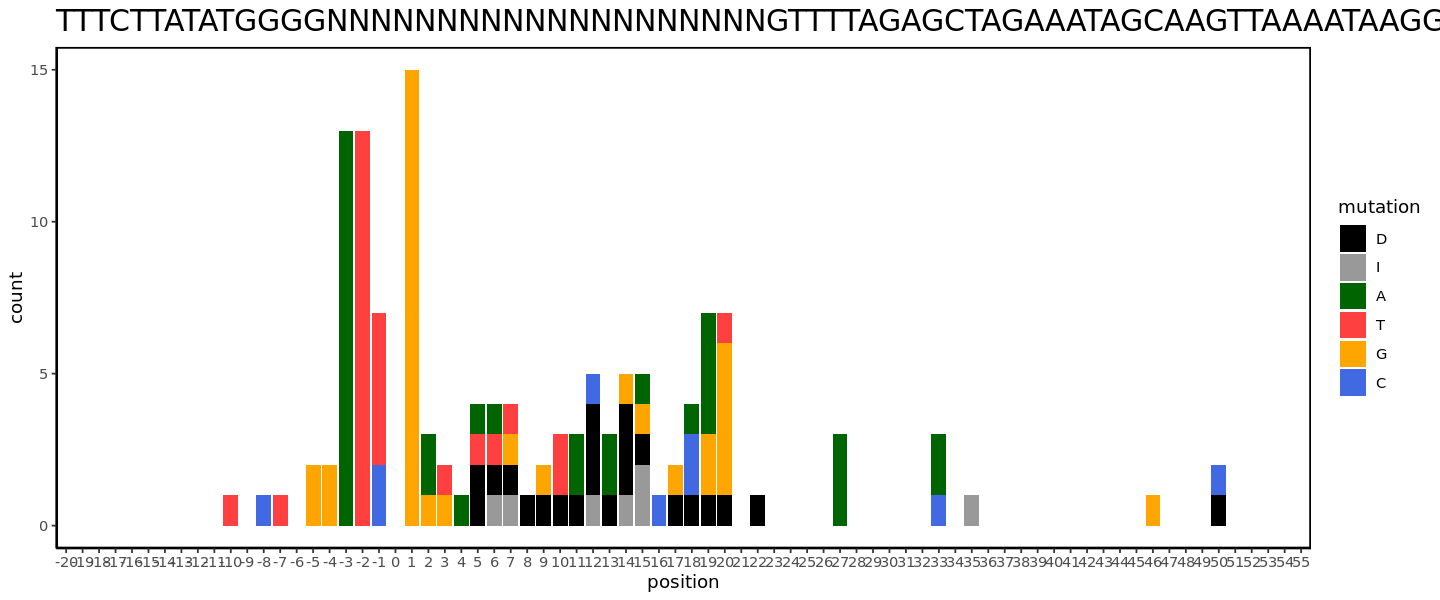

In [48]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-14
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 12, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TTTCTTATATGGGGNNNNNNNNNNNNNNNNNNNNGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGC')
#dev.off()

## correction TSO

In [53]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-14
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2 <- MT2[-which(MT2$position < 2),]
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
options(repr.plot.width = 12, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TTTCTTATATGGGGNNNNNNNNNNNNNNNNNNNNGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGC')
dev.off()

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


png 
  2

In [50]:
head(MT2[which(MT2$position == 1),])

,gene name,structure,structure length,position,mutation,variant number,MT_type,mutation2
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>
5,CTRL1_gRNA10_gene,gRNA,21,1,G,CTRL1_gRNA10_gene_variant_49,S,G
8,SMARCC1_gRNA1_gene,gRNA,21,1,G,SMARCC1_gRNA1_gene_variant_1,S,G
27,CTRL1_gRNA12_gene,gRNA,21,1,G,CTRL1_gRNA12_gene_variant_5,S,G
31,INO80C_gRNA1_gene,gRNA,21,1,G,INO80C_gRNA1_gene_variant_62,S,G
37,CTRL1_gRNA7_gene,gRNA,21,1,G,CTRL1_gRNA7_gene_variant_73,S,G
47,ARID1A_gRNA2_gene,gRNA,21,1,G,ARID1A_gRNA2_gene_variant_70,S,G


The reference sequence infront of gRNA spacer is short => imperfect mapping => TSO region mapping not trustworthy because of too short.   
Therefore, do not look at TSO region and also position 1. 


### Cell assignment

Rows: 6260 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


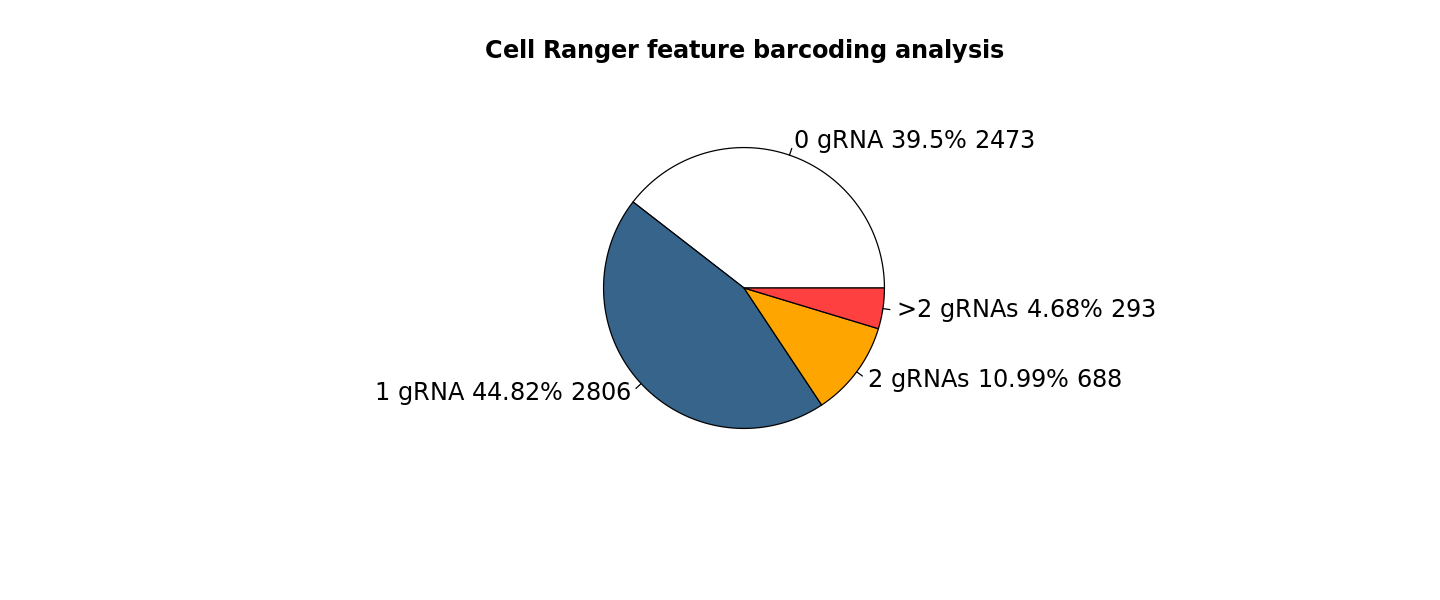

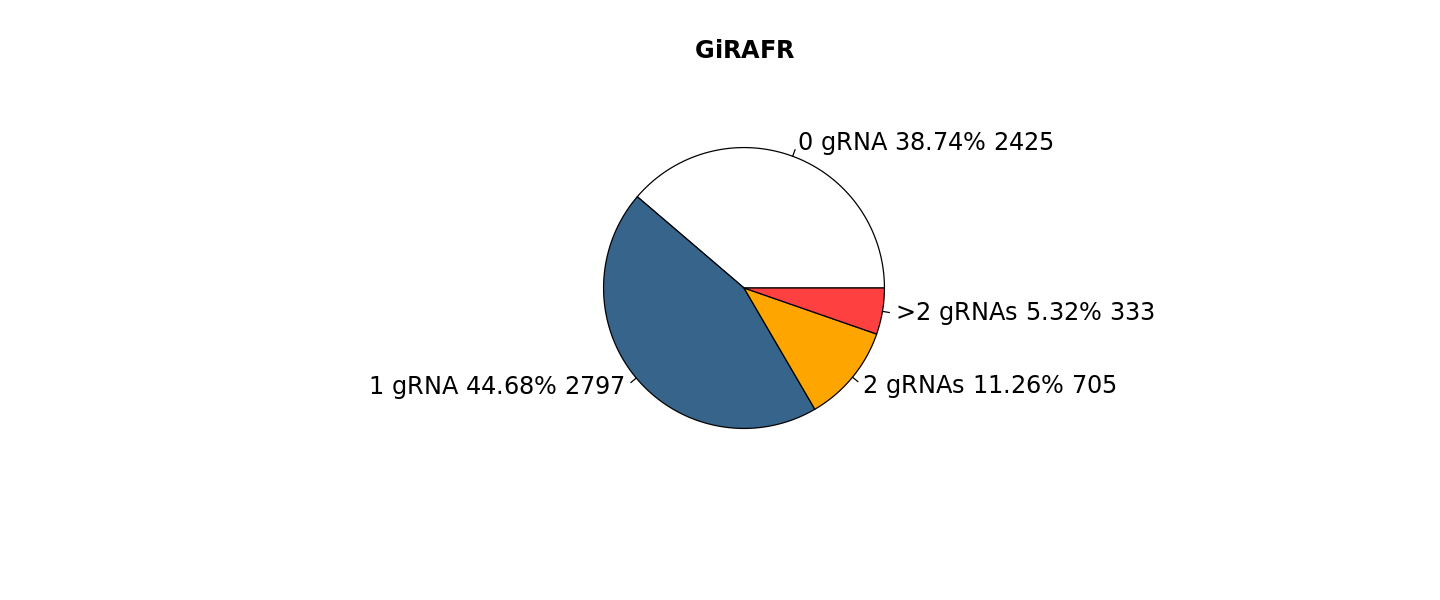

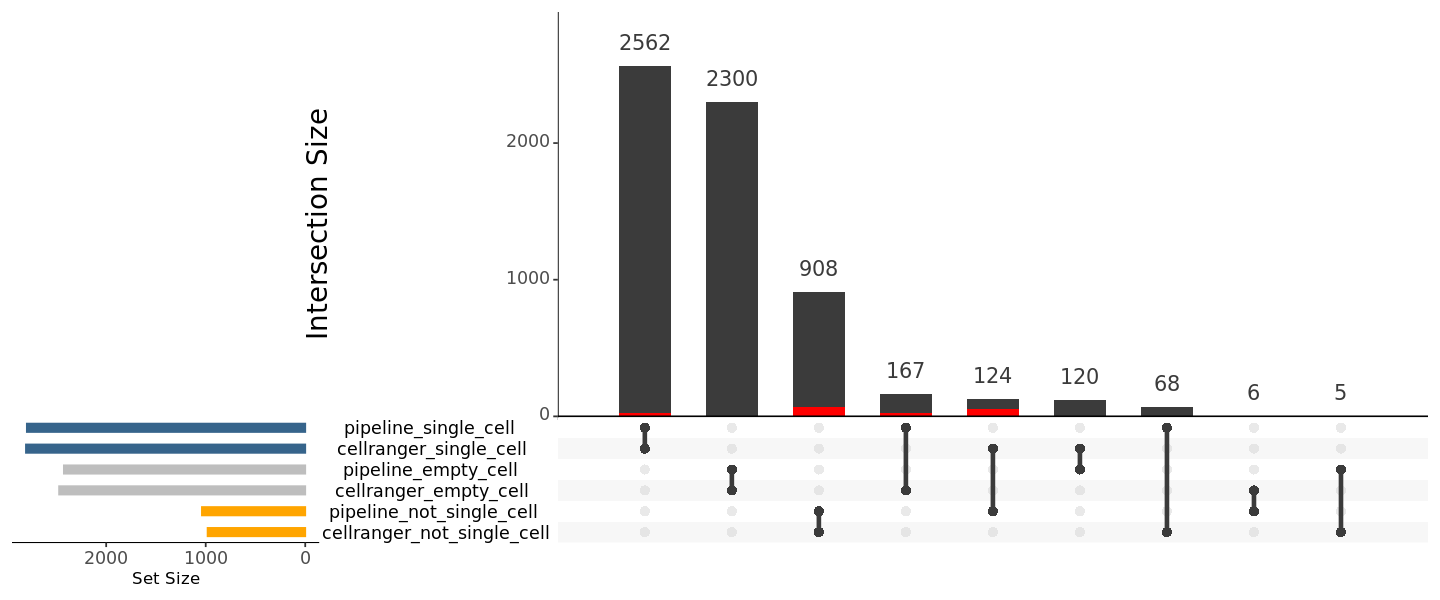

In [14]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Belk_CancerCell/feature_barcoding/V35_M2B/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Belk_CancerCell/feature_barcoding/V35_M2B/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)

# V41_M2R

In [54]:
input_dir = './GiRAFR_outputs/Belk_CancerCell/sample2/'
output_dir = './figures_results/Belk_CancerCell/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 13341"
[1] "Wildtype UMI: 496276"
[1] "Mutant UMI: 33470"


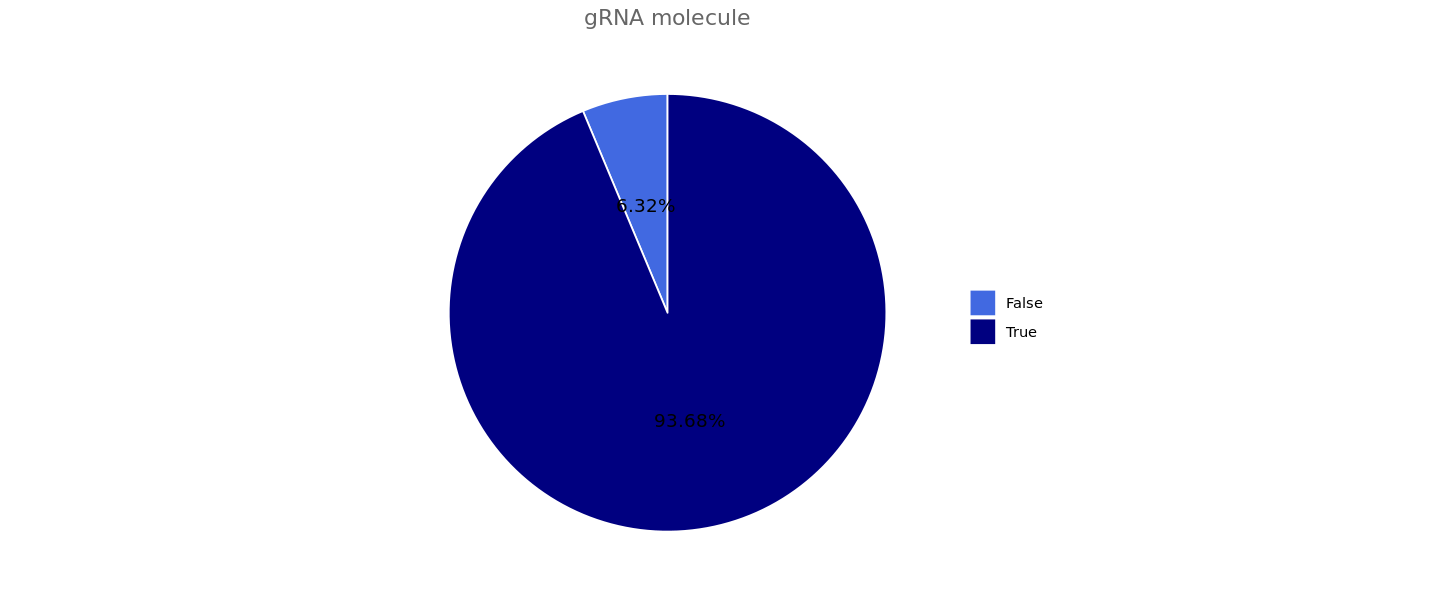

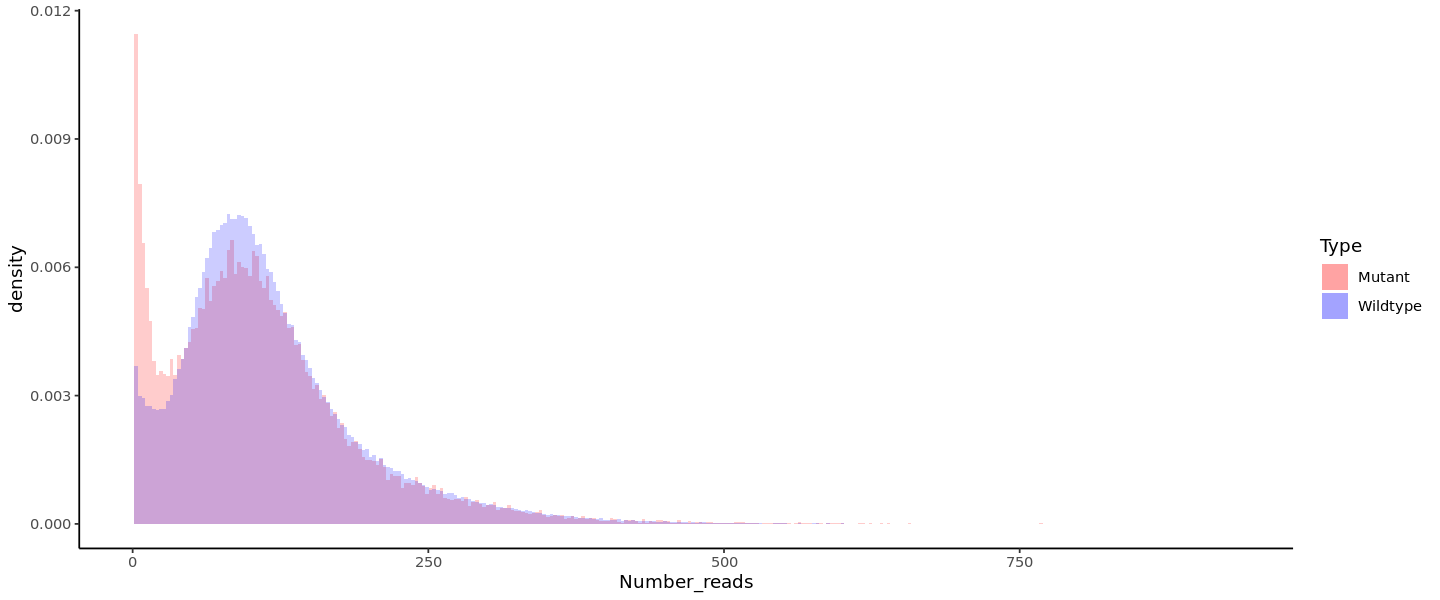

In [16]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [18]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 21878"
[1] "MT_virus: 11579"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(3)    G I(1)    T 
  54   23   24    2   48    5   64 
[1] "MT mutation type"

  D   I   S 
 26   5 189 
[1] "MT mutation structure"

gRNA Rest  TSO 
  98    9  113 


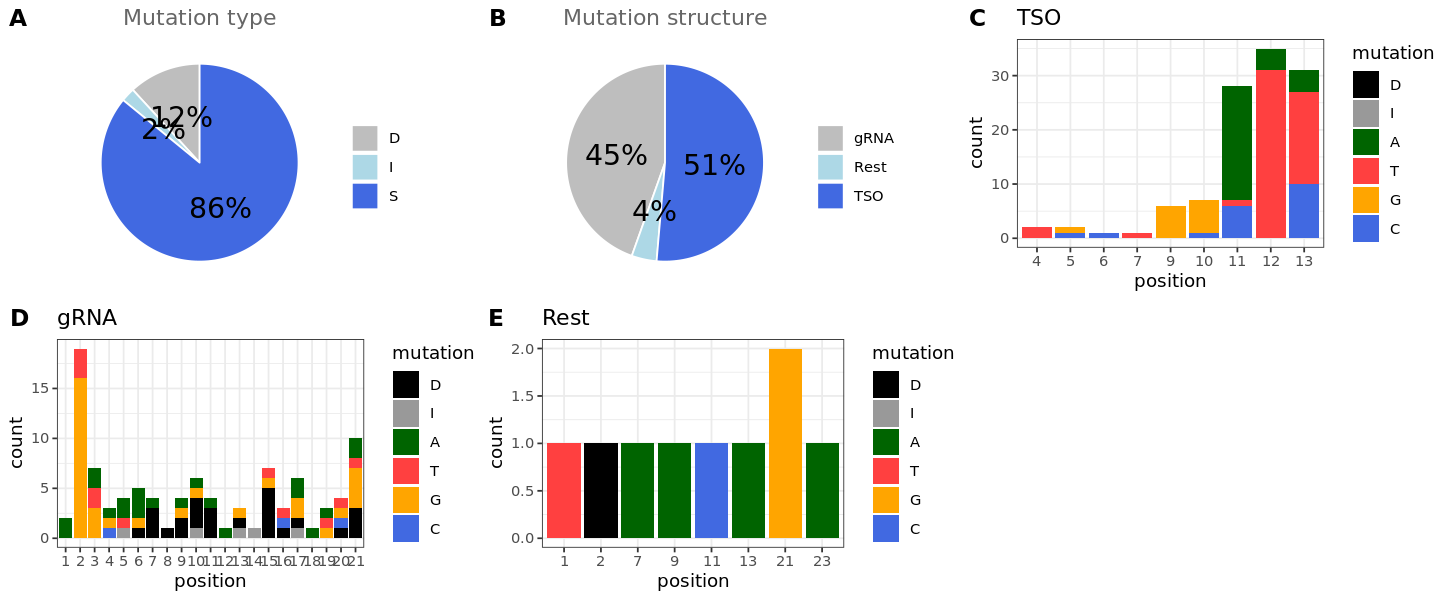

In [55]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [57]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.497   2.000  10.000 

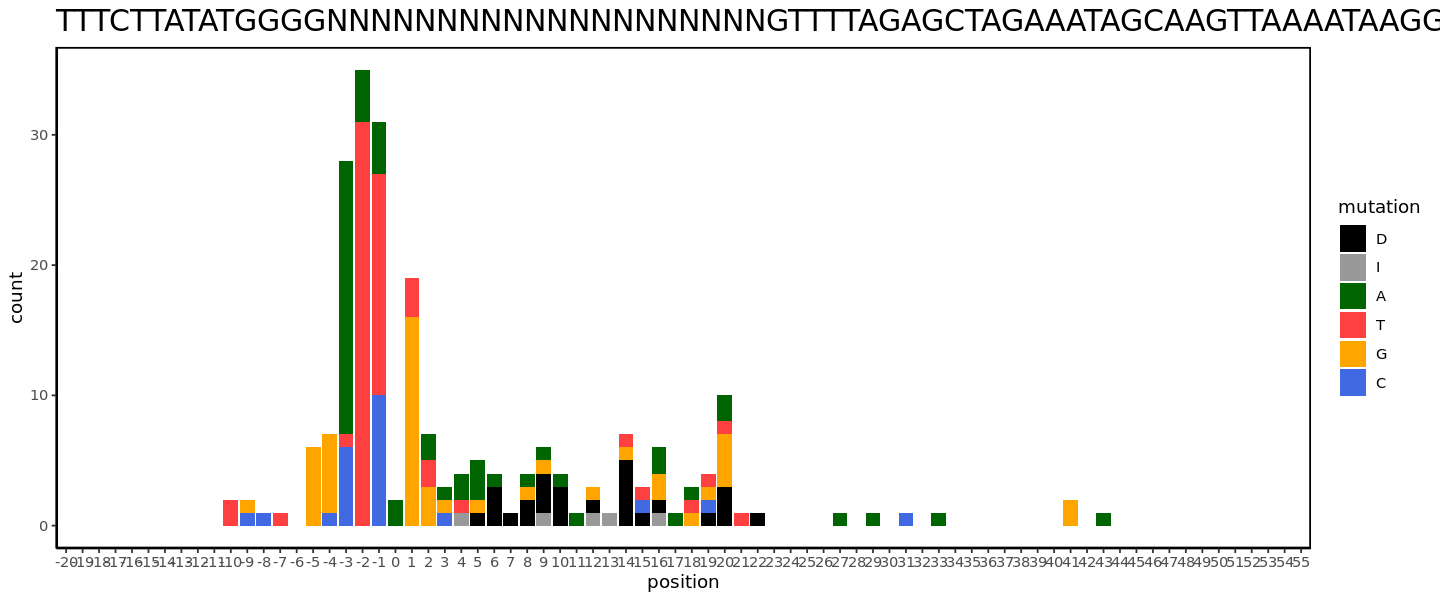

In [58]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-14
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
options(repr.plot.width = 12, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TTTCTTATATGGGGNNNNNNNNNNNNNNNNNNNNGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGC')
#dev.off()

In [60]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-14
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2 <- MT2[-which(MT2$position < 2),]
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
options(repr.plot.width = 12, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TTTCTTATATGGGGNNNNNNNNNNNNNNNNNNNNGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGC')
dev.off()

png 
  2

### Cell assignment

Rows: 14270 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


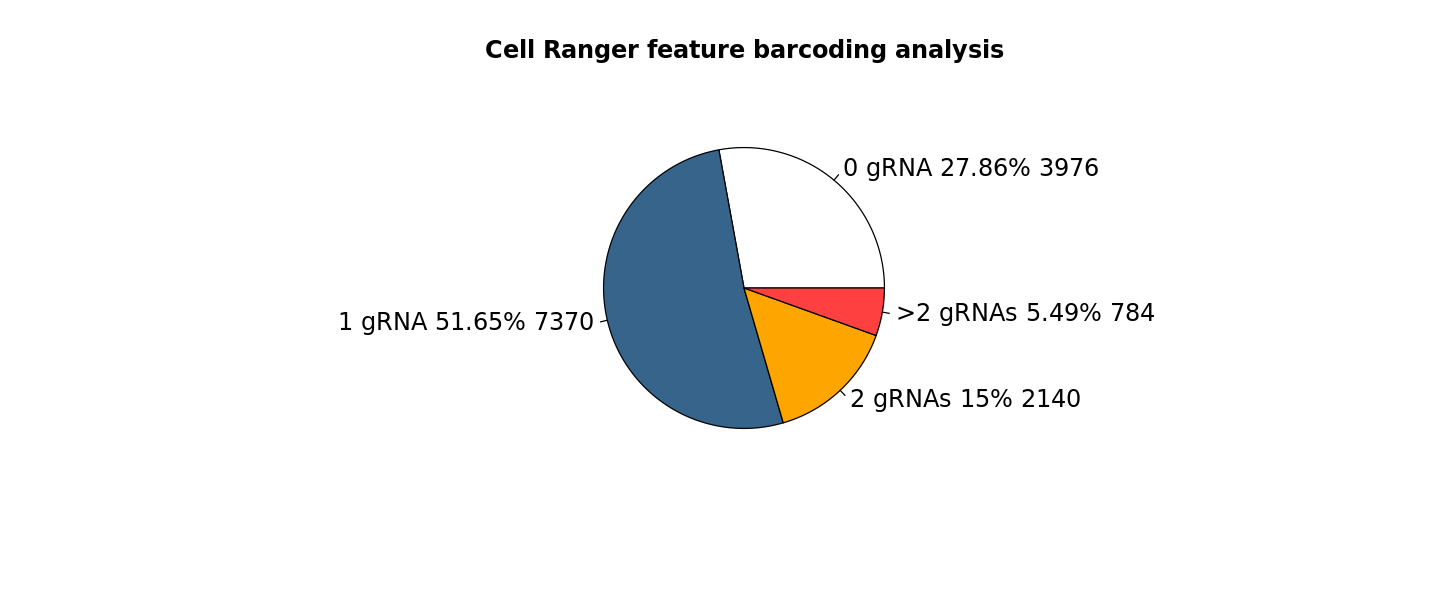

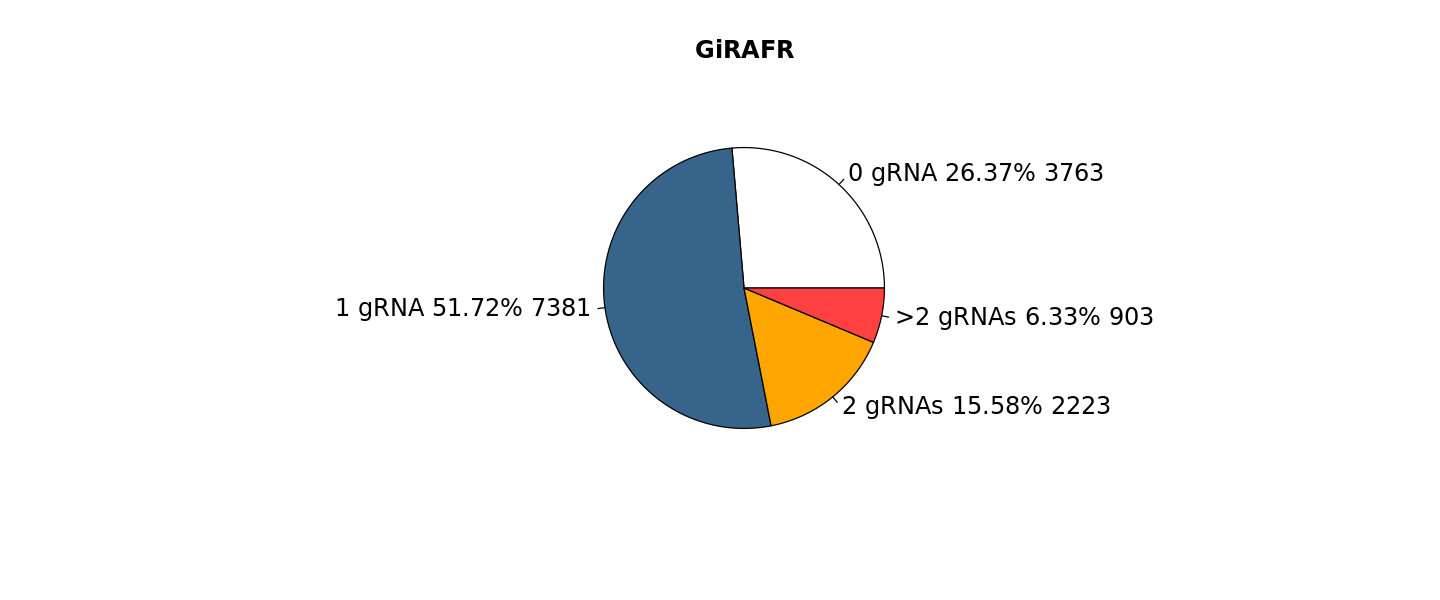

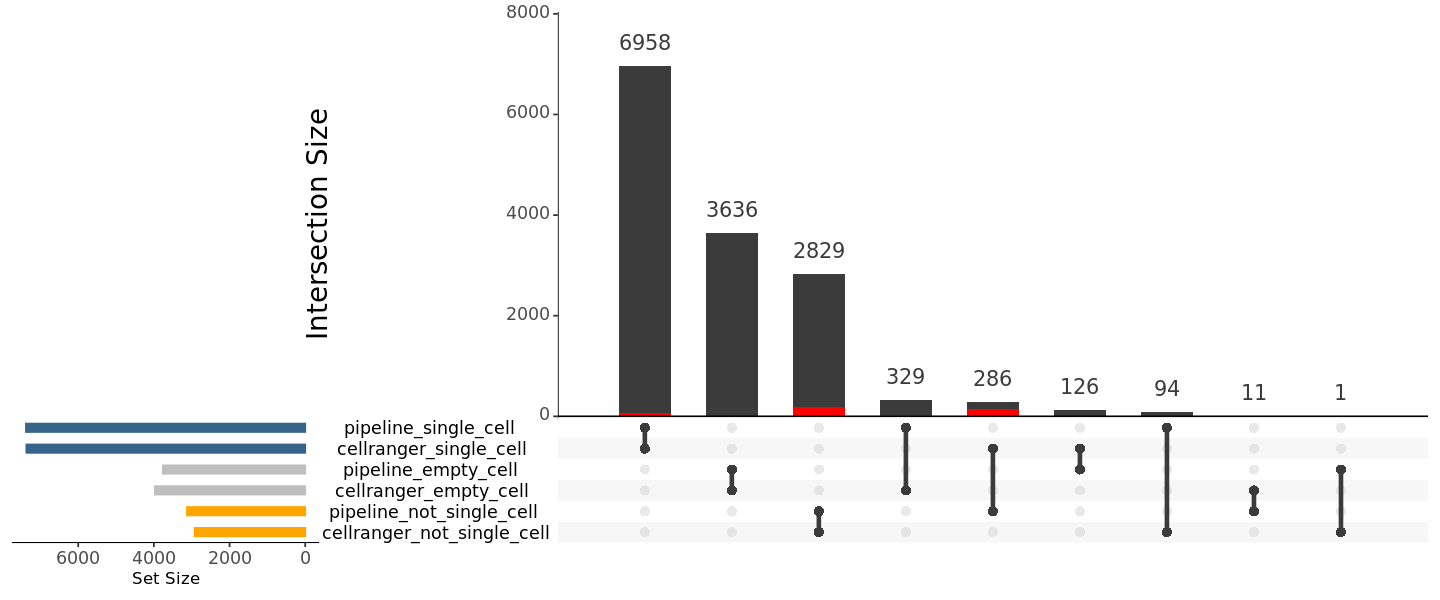

In [25]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Belk_CancerCell/feature_barcoding/V41_M2R/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Belk_CancerCell/feature_barcoding/V41_M2R/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)

# combine samples MT position

In [65]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Belk_CancerCell/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Belk_CancerCell/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

save_pdf <- paste0('./figures_results/Belk_CancerCell/', 'Combined.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
options(repr.plot.width = 16, repr.plot.height = 5)
MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-14
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2 <- MT2[-which(MT2$position < 2),]
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TTTCTTATATGGGGNNNNNNNNNNNNNNNNNNNNGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGC')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/2))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,8))
dev.off()

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”
Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 14270 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


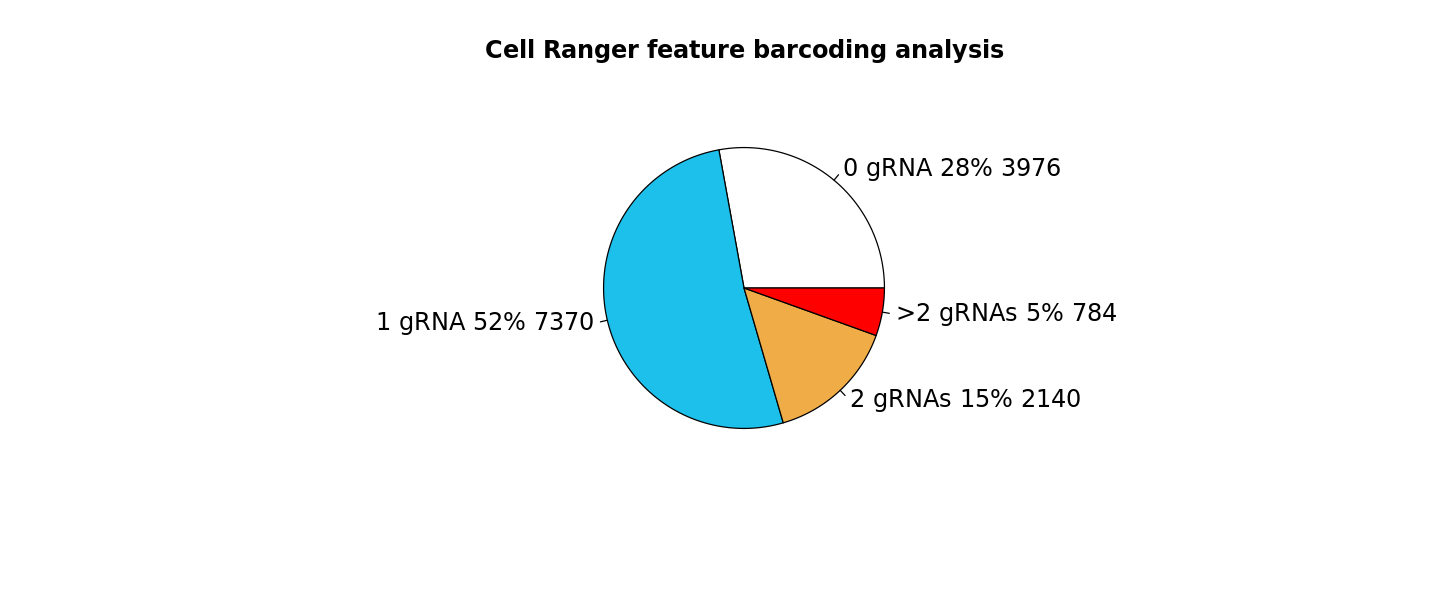

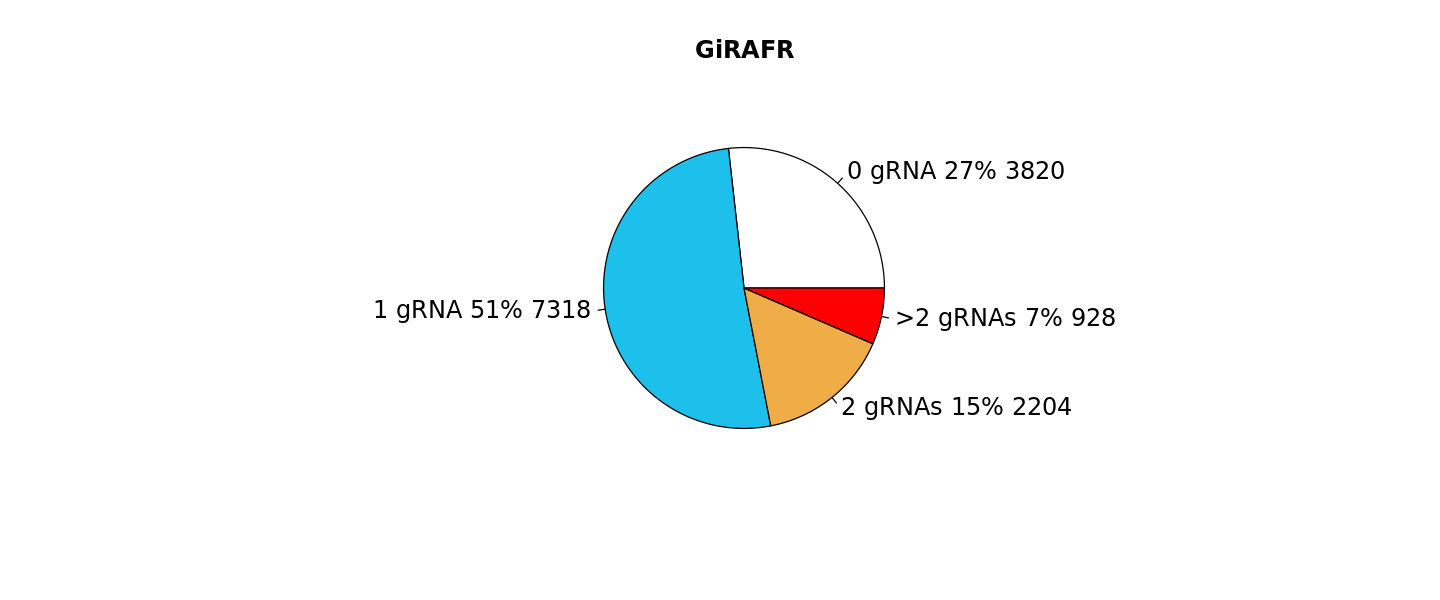

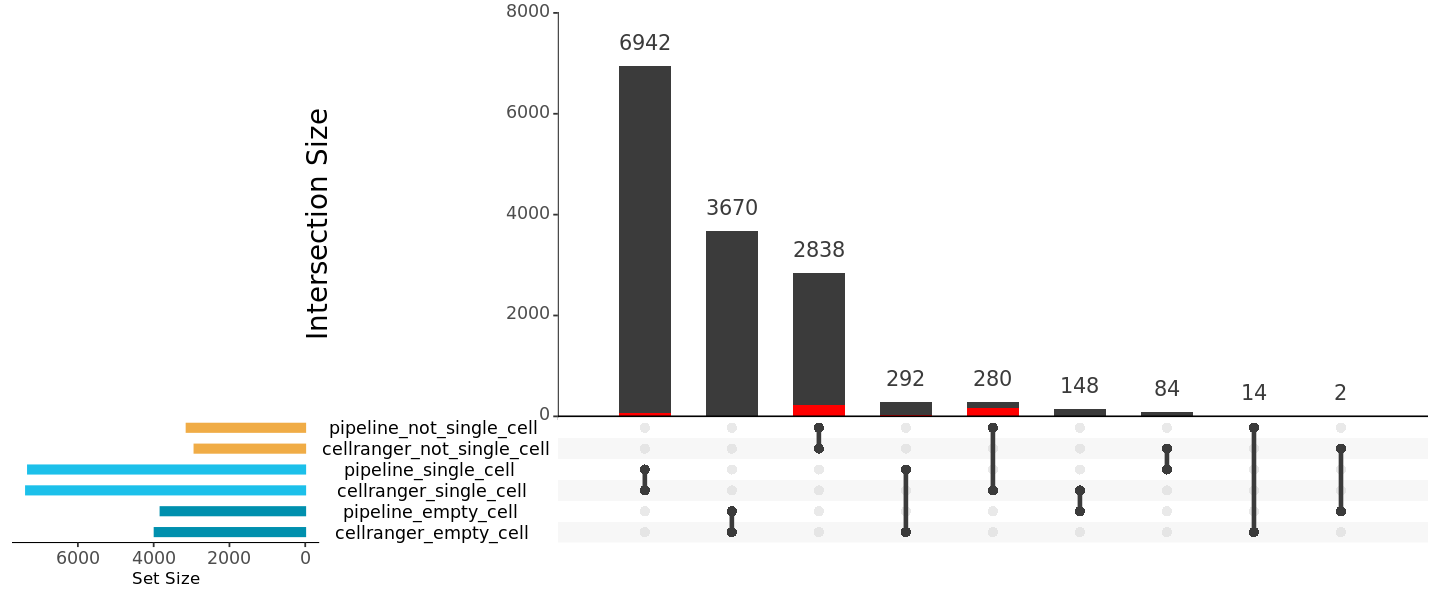

In [22]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Belk_CancerCell/feature_barcoding/V41_M2R/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Belk_CancerCell/feature_barcoding/V41_M2R/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)